In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
df = pd.read_csv('Datasets/train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [34]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

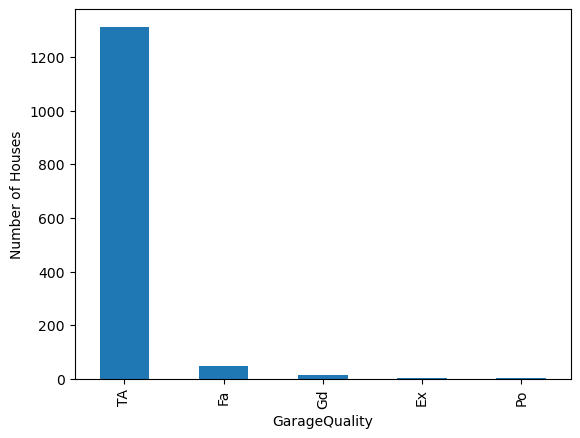

In [35]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('GarageQuality')
plt.ylabel('Number of Houses')
plt.show()

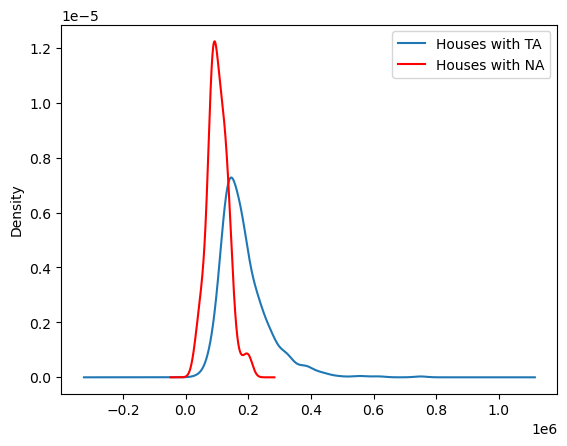

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111)
df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde',ax=ax)
df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde',ax=ax,color='red')
lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with TA','Houses with NA']
ax.legend(lines,labels,loc='best')

In [38]:
df[df['GarageQual'].isnull()]['SalePrice'].shape

(81,)

In [39]:
temp = df[df['GarageQual']=='TA']['SalePrice']

In [42]:
temp.shape

(1311,)

In [43]:
df['GarageQual'].fillna('TA',inplace=True)

<AxesSubplot:>

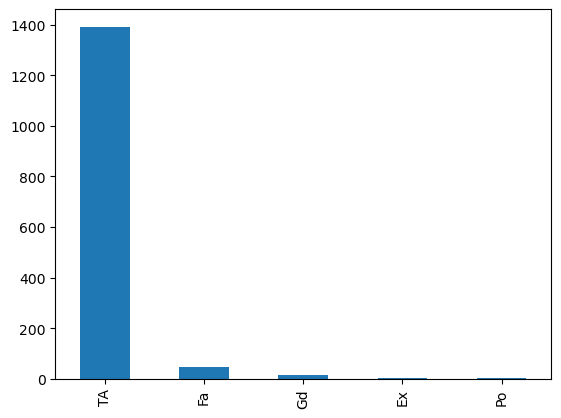

In [44]:
df['GarageQual'].value_counts().plot.bar()

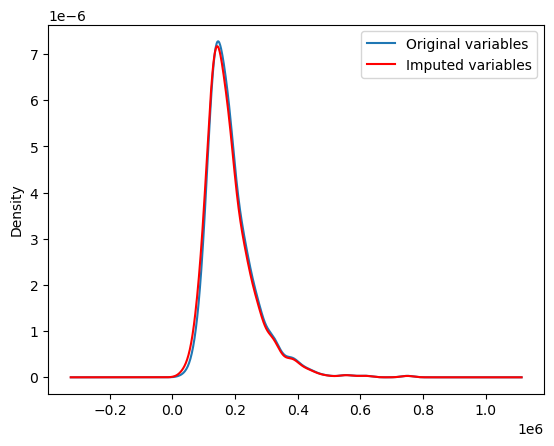

In [45]:
fig = plt.figure()
ax = fig.add_subplot(111)

temp.plot(kind='kde',ax=ax)
df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde',ax=ax,color='red')
lines, labels = ax.get_legend_handles_labels()
labels = ['Original variables','Imputed variables']
ax.legend(lines,labels,loc='best')
plt.show()

<AxesSubplot:>

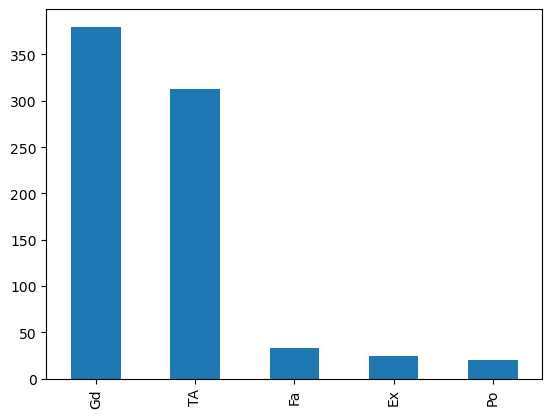

In [46]:
df['FireplaceQu'].value_counts().plot.bar()

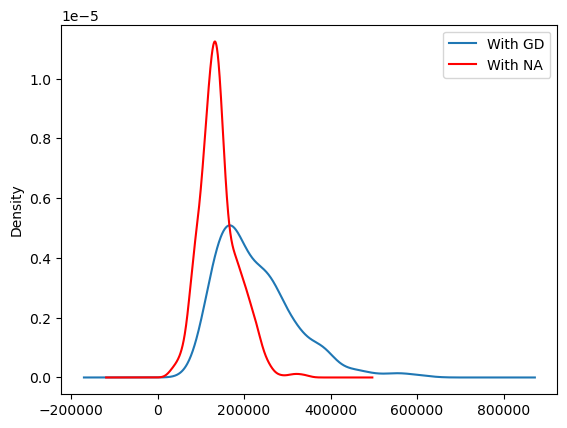

In [48]:
fig = plt.figure()
ax = fig.add_subplot(111)
df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde',ax=ax)
df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde',ax=ax,color='red')
lines, labels = ax.get_legend_handles_labels()
labels = ['With GD','With NA']
ax.legend(lines,labels,loc='best')
plt.show()

In [49]:
temp = df[df['FireplaceQu']=='Gd']['SalePrice']

In [51]:
df['FireplaceQu'].fillna('Gd',inplace=True)

<AxesSubplot:>

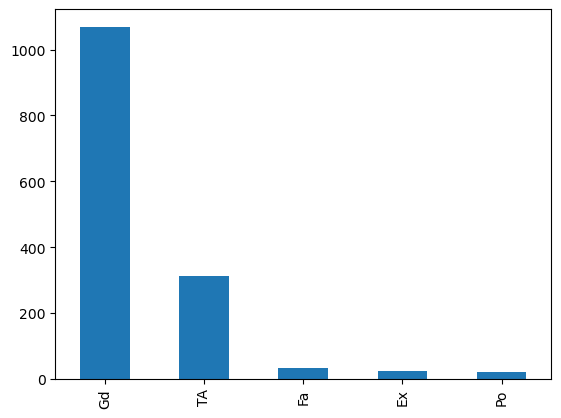

In [53]:
df['FireplaceQu'].value_counts().plot(kind='bar')

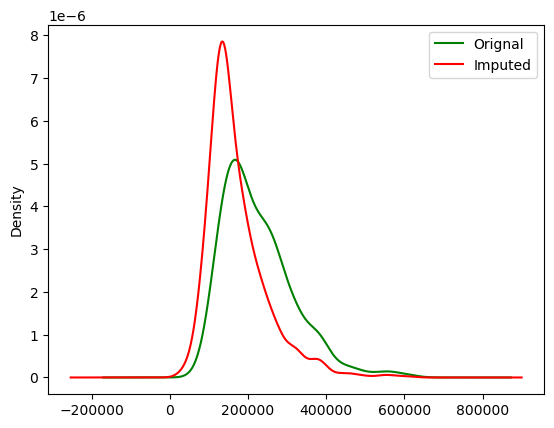

In [56]:
fig = plt.figure()
ax = fig.add_subplot(111)
temp.plot(kind='kde',ax=ax,color='green')

df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde',ax=ax,color='red')
lines, labels = ax.get_legend_handles_labels()
labels = ['Orignal','Imputed']
ax.legend(lines,labels,loc='best')
plt.show()

In [58]:
# This imputation using sklearn library 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [59]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(['SalePrice'],axis=1),df['SalePrice'],test_size=0.2,random_state=42)

In [60]:
imputer = SimpleImputer(strategy='most_frequent')

In [61]:
X_train_transform = imputer.fit_transform(X_train)
X_test_transform = imputer.transform(X_test)

In [62]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)

# Missing imputation category 

In [65]:
df1 = pd.read_csv('Datasets/train.csv')[['GarageQual','FireplaceQu','SalePrice']]
df1.head()

,GarageQual,FireplaceQu,SalePrice
0,TA,NaN,208500
1,TA,TA,181500
2,TA,TA,223500
3,TA,Gd,140000
4,TA,TA,250000


In [66]:
df1['GarageQual'].fillna('Missing',inplace=True)

In [67]:
df1['FireplaceQu'].fillna('Missing',inplace=True)

<AxesSubplot:>

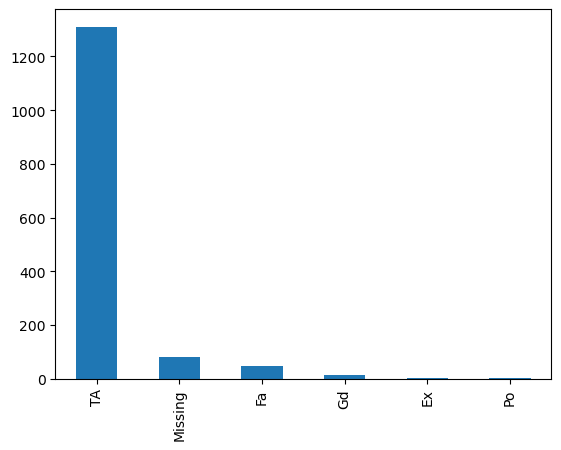

In [68]:
df1['GarageQual'].value_counts().plot(kind='bar')

<AxesSubplot:>

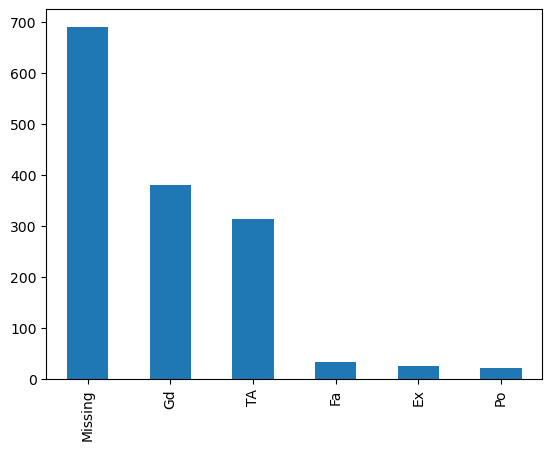

In [70]:
df1['FireplaceQu'].value_counts().plot(kind='bar')

So adding new category will not dominant other a one category on other so keep in mind the rule tha only 5% missing values should be replace by mean or median and use simpleimputer to facilitate ourself